In [1]:
import numpy as np                                  # Scientific computing

import pandas as pd                                 # Data Frame

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation

In [2]:
df = pd.read_csv("../csv/data.csv", index_col="id")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4972 entries, 1lpUQgU5hPwQ4wk5mqewm8 to 2Fxmhks0bxGSBdJ92vM42m
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      4971 non-null   float64
 1   danceability      4971 non-null   float64
 2   speechiness       4971 non-null   float64
 3   key               4971 non-null   float64
 4   loudness          4971 non-null   float64
 5   instrumentalness  4971 non-null   float64
 6   valence           4971 non-null   float64
 7   duration_ms       4971 non-null   float64
 8   mode              4971 non-null   float64
 9   energy            4971 non-null   float64
 10  liveness          4971 non-null   float64
 11  tempo             4971 non-null   float64
 12  time_signature    4971 non-null   float64
dtypes: float64(13)
memory usage: 543.8+ KB


,acousticness,danceability,speechiness,key,loudness,instrumentalness,valence,duration_ms,mode,energy,liveness,tempo,time_signature
id,,,,,,,,,,,,,
1lpUQgU5hPwQ4wk5mqewm8,0.00145,0.589,0.0465,1.0,-5.817,0.182000,0.5770,138573.0,1.0,0.865,0.102,149.974,4.0
31S2GAI8WKVCnCNjQOzs9U,0.02710,0.599,0.2790,5.0,-6.068,0.000003,0.4550,126981.0,1.0,0.726,0.137,84.868,4.0
4DferDVxwfwR4hQZiVBDvW,0.02340,0.287,0.0402,4.0,-8.544,0.349000,0.0602,213657.0,1.0,0.575,0.236,177.097,4.0
6tAKikIvnoWfUeZrfkopLL,0.01770,0.790,0.1170,11.0,-4.637,0.000192,0.8980,146087.0,0.0,0.979,0.237,161.014,4.0
5dPy1CCYQ04xaQHpajf5CY,0.01170,0.715,0.0356,8.0,-7.478,0.899000,0.7610,192940.0,1.0,0.741,0.189,112.000,4.0


In [3]:
df.dropna(inplace=True)
df.drop(["duration_ms", "loudness"], inplace=True, axis=1)
df.head()

,acousticness,danceability,speechiness,key,instrumentalness,valence,mode,energy,liveness,tempo,time_signature
id,,,,,,,,,,,
1lpUQgU5hPwQ4wk5mqewm8,0.00145,0.589,0.0465,1.0,0.182000,0.5770,1.0,0.865,0.102,149.974,4.0
31S2GAI8WKVCnCNjQOzs9U,0.02710,0.599,0.2790,5.0,0.000003,0.4550,1.0,0.726,0.137,84.868,4.0
4DferDVxwfwR4hQZiVBDvW,0.02340,0.287,0.0402,4.0,0.349000,0.0602,1.0,0.575,0.236,177.097,4.0
6tAKikIvnoWfUeZrfkopLL,0.01770,0.790,0.1170,11.0,0.000192,0.8980,0.0,0.979,0.237,161.014,4.0
5dPy1CCYQ04xaQHpajf5CY,0.01170,0.715,0.0356,8.0,0.899000,0.7610,1.0,0.741,0.189,112.000,4.0


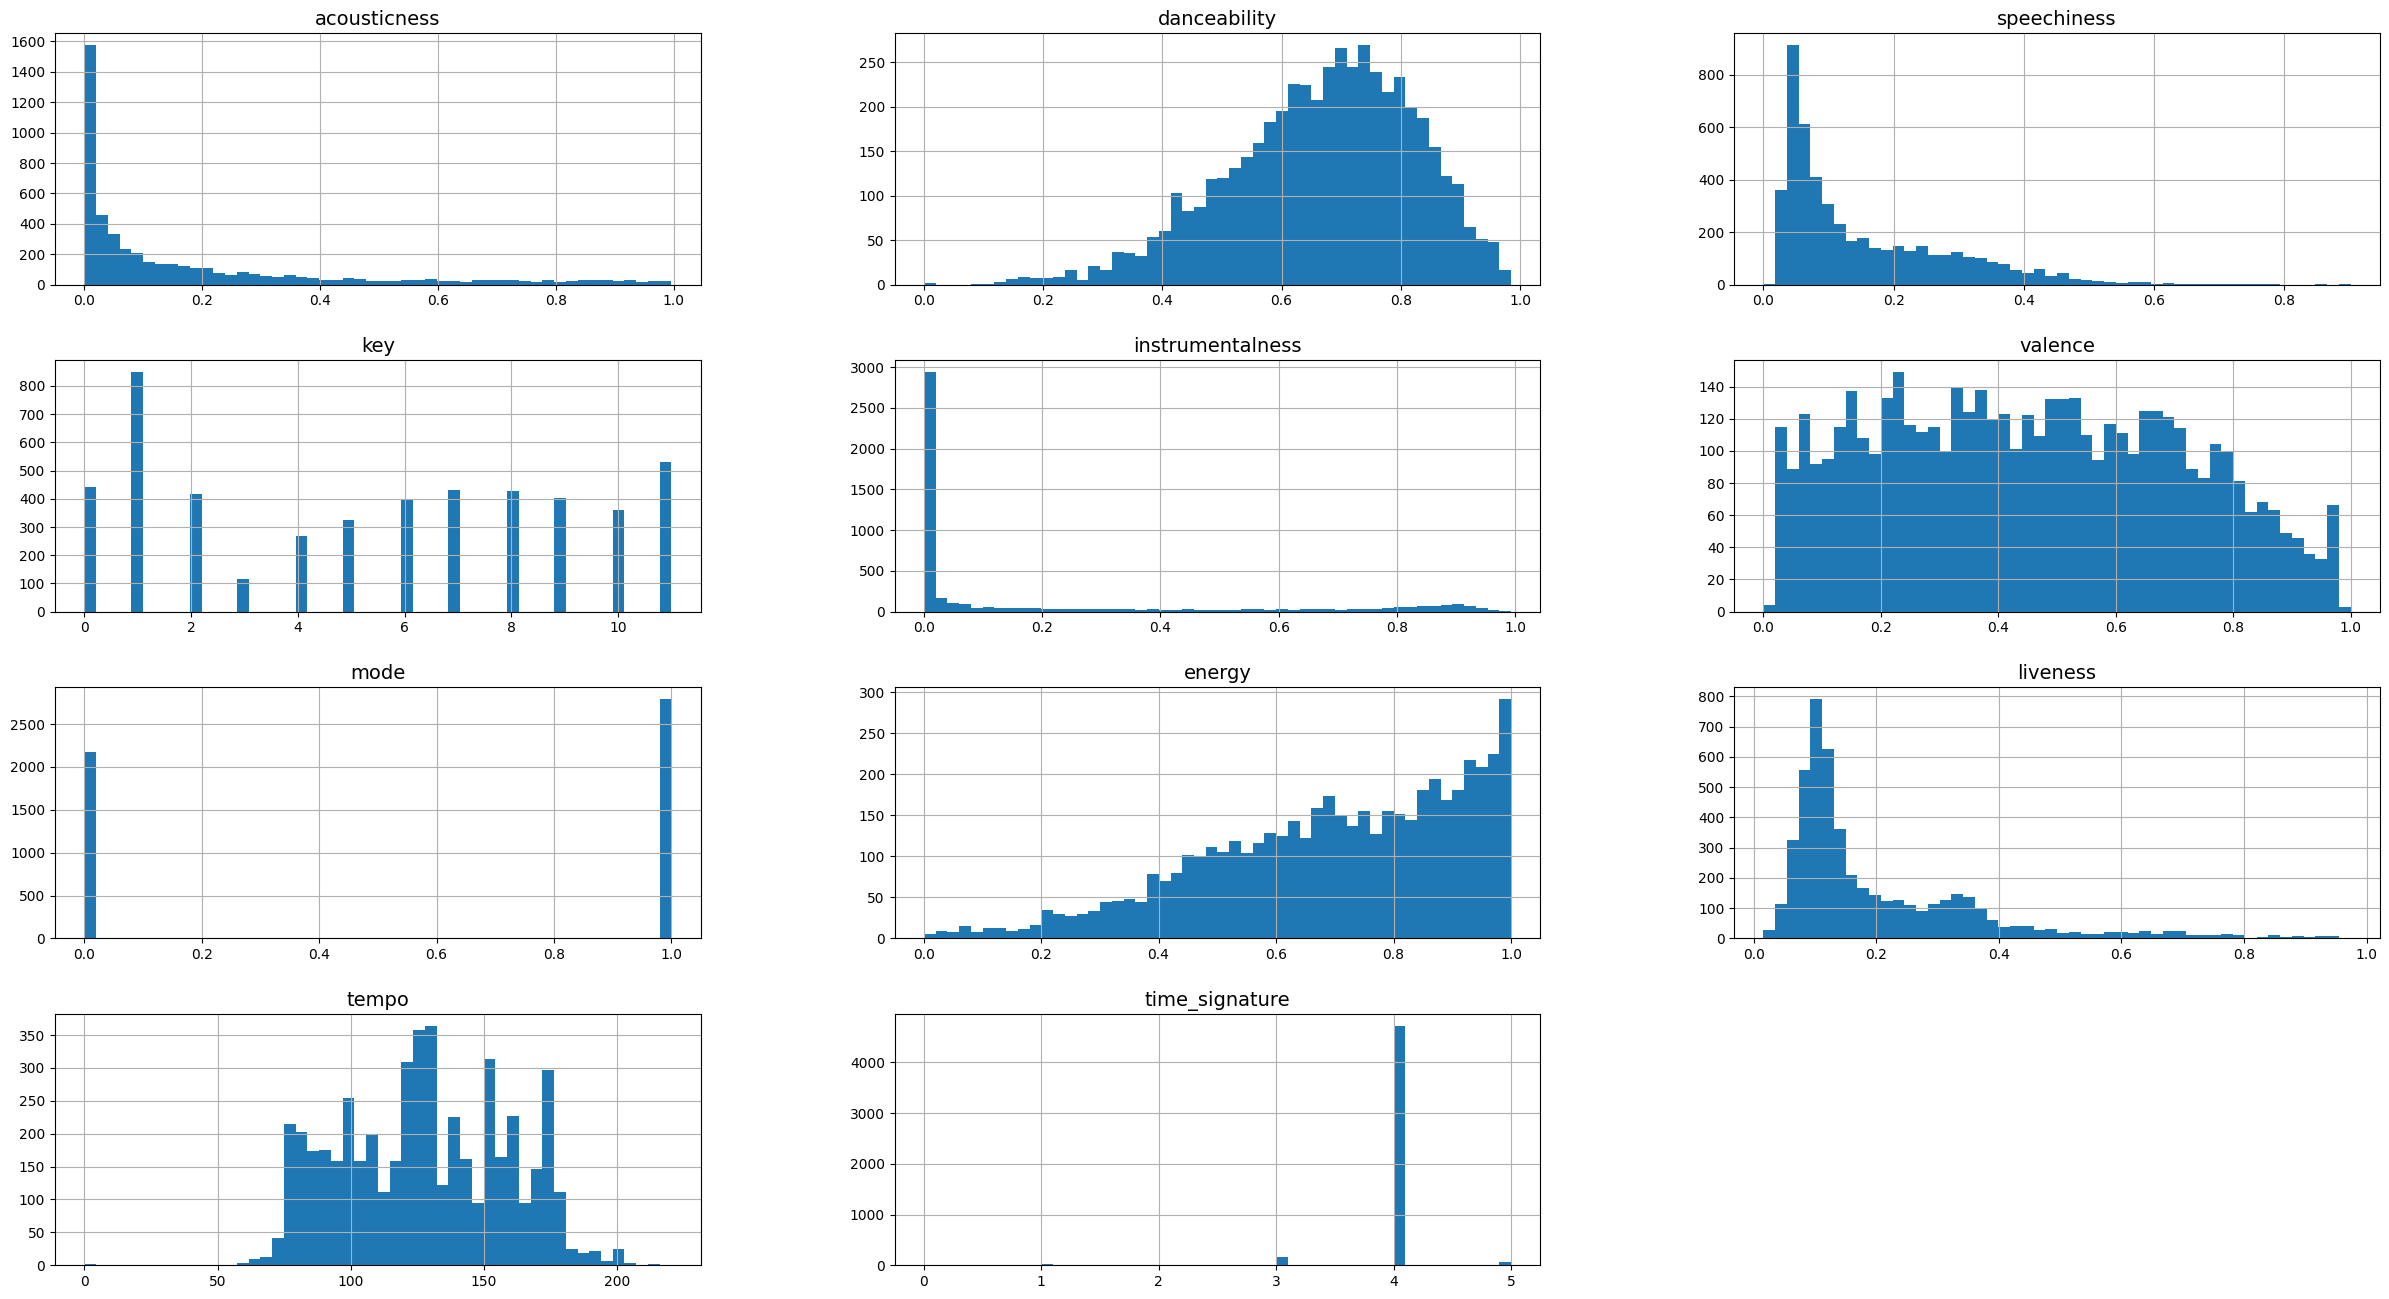

In [4]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# weblogs_hists = weblogs[["TOTAL_DURATION"]]
df.hist(bins=50, figsize=(30, 16), )
plt.show()

# Prepros

In [5]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FunctionTransformer, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_pipeline = make_pipeline(
   StandardScaler(),
)

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
)

pre_pros = make_column_transformer(
    (num_pipeline, ["acousticness","danceability","speechiness","instrumentalness","valence","energy","liveness","tempo"]),
    (cat_pipeline, ["time_signature", "key", "mode"]),
    remainder='passthrough'
)
# x = pre_pros.fit_transform(df)
# df = pd.DataFrame(x, columns=pre_pros.get_feature_names_out())

# Visuals with TSNE

In [6]:
from sklearn.manifold import TSNE

tsne = make_pipeline(pre_pros, TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42))

X_reduced = tsne.fit_transform(df)

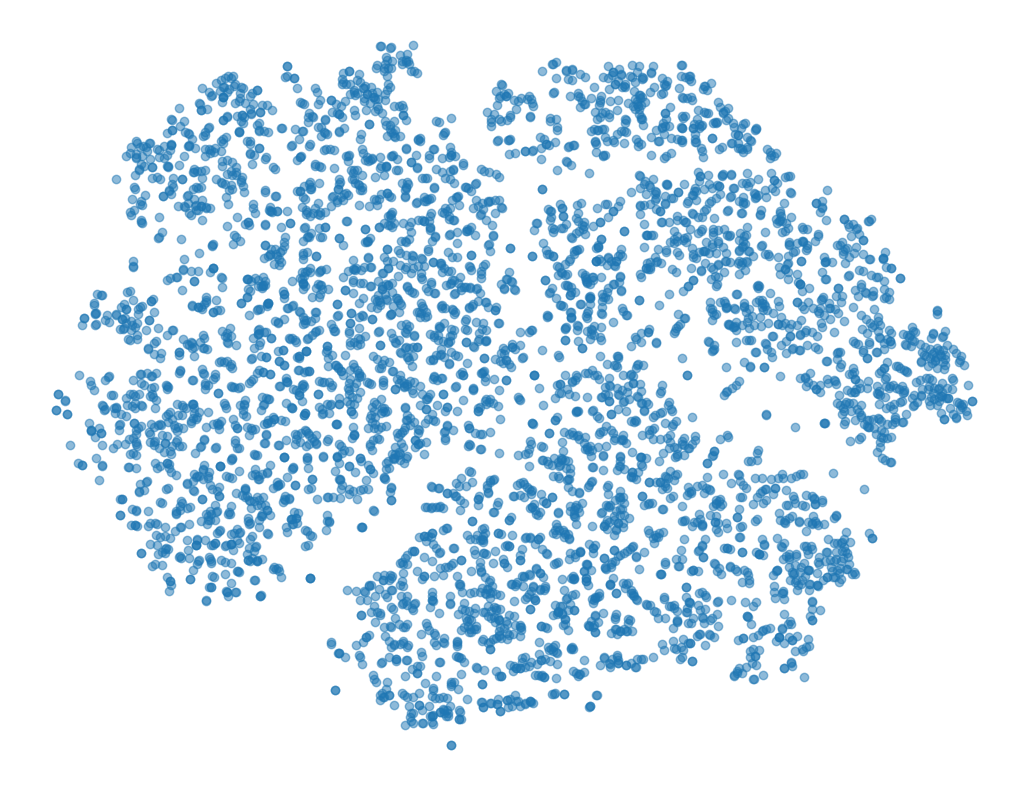

In [7]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
plt.axis('off')
plt.show()

# K-Means

In [8]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=10, random_state=42,n_init="auto") 
y_pred = kmeans.fit_predict(df)
df_kmeans = df.copy()
df_kmeans["playlist"] = y_pred
df_kmeans[df_kmeans["playlist"] == 1].head(10)

,acousticness,danceability,speechiness,key,instrumentalness,valence,mode,energy,liveness,tempo,time_signature,playlist
id,,,,,,,,,,,,
5dPy1CCYQ04xaQHpajf5CY,0.011700,0.715,0.0356,8.0,0.899000,0.7610,1.0,0.741,0.1890,112.000,4.0,1
071KHxhsbaToXwJpV4VecJ,0.001600,0.489,0.0568,2.0,0.810000,0.0935,0.0,0.914,0.1440,110.980,3.0,1
6rECwxmHDJEJEkPfLHlGac,0.000804,0.569,0.0756,4.0,0.000015,0.4830,0.0,0.672,0.0902,109.925,3.0,1
6E1YebXpPPtujMUljDNlOo,0.082700,0.519,0.0763,8.0,0.000000,0.0862,1.0,0.546,0.1330,115.799,4.0,1
1uupDYcG6zHJFv5Z0HCZyz,0.000015,0.439,0.0369,1.0,0.926000,0.4140,1.0,0.497,0.1180,112.480,5.0,1
0pk6N8dYtK9R4O2k5aazfl,0.047600,0.832,0.2440,8.0,0.000047,0.8910,1.0,0.669,0.3820,108.869,4.0,1
52Td1R2HmvP5gevSgUaifx,0.056200,0.611,0.0283,8.0,0.927000,0.5700,0.0,0.718,0.1940,105.788,4.0,1
6KMjIbEfq7VlZVfESNpFc2,0.022800,0.549,0.0800,3.0,0.000000,0.5960,1.0,0.829,0.0996,109.986,4.0,1
7cqdphhr6kMRe3YeSK3q7O,0.690000,0.755,0.0364,0.0,0.177000,0.7710,0.0,0.777,0.1720,110.035,4.0,1


In [9]:
from sklearn.cluster import KMeans

k_range = [2, 3, 4, 5] + list(range(6, 100, 3))
kmeans_per_k = []
for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    pipe = make_pipeline(pre_pros, kmeans)
    pipe.fit(df)
    kmeans_per_k.append(kmeans)

k=2
k=3
k=4
k=5
k=6
k=9


k=12
k=15
k=18
k=21
k=24
k=27
k=30
k=33
k=36
k=39
k=42
k=45
k=48
k=51
k=54
k=57
k=60
k=63
k=66
k=69
k=72
k=75
k=78
k=81
k=84
k=87
k=90
k=93
k=96
k=99


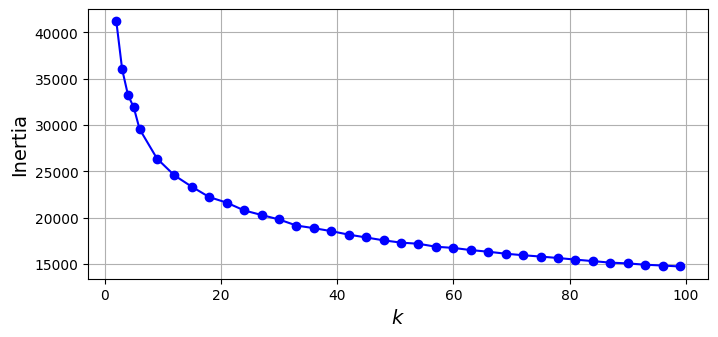

In [10]:

inertias = [model.inertia_ for model in kmeans_per_k]
inertias
plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid()
plt.show()

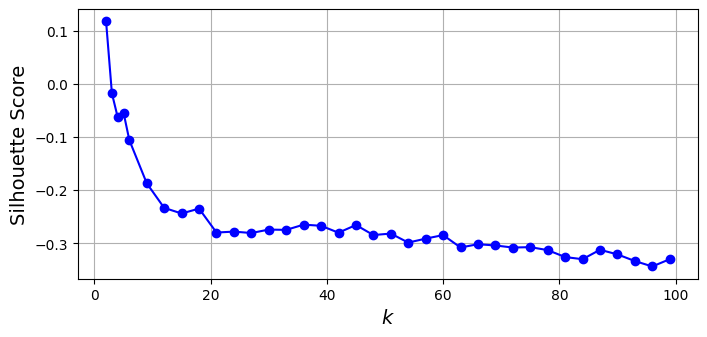

In [11]:
from sklearn.metrics import silhouette_score


sil_score = np.array([silhouette_score(df, model.labels_) for model in kmeans_per_k])
plt.figure(figsize=(8, 3.5))
plt.plot(k_range, sil_score, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

In [12]:
sil_score.max()
best_kmeans = kmeans_per_k[sil_score.argmax()]
best_kmeans

KMeans(n_clusters=2, n_init='auto', random_state=42)

In [13]:
best_kmeans = KMeans(n_clusters=18)

In [15]:
y_pred = make_pipeline(pre_pros, best_kmeans).fit_predict(df)

df_kmeans = df.copy()
df_kmeans["playlist"] = y_pred
display(df_kmeans["playlist"].value_counts())
df_kmeans[df_kmeans["playlist"] == 10].head(10)

c:\Users\rosie\Documents\dev\Sortify\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


playlist
8     477
17    477
3     436
0     434
9     342
14    323
6     316
1     248
11    235
2     224
5     218
7     210
13    206
16    206
15    177
12    171
10    145
4     126
Name: count, dtype: int64

,acousticness,danceability,speechiness,key,instrumentalness,valence,mode,energy,liveness,tempo,time_signature,playlist
id,,,,,,,,,,,,
2AMuw3ep87nhUyew2N01b9,0.000154,0.346,0.0588,3.0,0.240000,0.279,1.0,0.868,0.699,85.935,4.0,10
5gCMxQu4uNxUC2yJcRs3WX,0.000229,0.467,0.3840,7.0,0.460000,0.356,1.0,0.966,0.642,159.992,4.0,10
4Pfo128otRSv1a3pbc3mbs,0.058200,0.627,0.4980,6.0,0.924000,0.215,0.0,0.980,0.531,128.100,4.0,10
2dyeWlhqtGsDW7VpUroZwo,0.000138,0.445,0.0471,4.0,0.908000,0.942,1.0,0.968,0.939,161.007,4.0,10
4P2rBv6bjZV3TtpAEIA0dV,0.001030,0.530,0.2370,9.0,0.000106,0.167,0.0,0.962,0.887,174.979,4.0,10
0rRSZkq9v7U6gsmvpzGWZg,0.313000,0.549,0.4930,8.0,0.000000,0.801,1.0,0.865,0.679,174.870,4.0,10
6bdIdBEWA72AY417ebCh5M,0.004090,0.524,0.1710,0.0,0.001430,0.264,1.0,0.725,0.514,139.954,4.0,10
0rrV3btzinrUsqVk8hlWF2,0.163000,0.590,0.3200,1.0,0.000000,0.705,0.0,0.960,0.627,179.877,4.0,10
6ClHxhOeItekPokE6VszT4,0.122000,0.526,0.6190,1.0,0.000001,0.497,1.0,0.928,0.822,89.879,4.0,10


# Birch

In [41]:
from sklearn.cluster import Birch

brc = Birch(threshold=0.1, n_clusters=20)

y_pred = make_pipeline(pre_pros, brc).fit_predict(df)
silhouette_score(df, brc.labels_)

-0.24872247372742068

In [45]:
df_birch = df.copy()
df_birch["playlist"] = y_pred
display(df_birch["playlist"].value_counts())


df_birch[df_birch["playlist"] == 2].head(10)

playlist
1     499
4     451
5     411
15    381
3     366
6     327
0     298
8     268
2     258
16    249
9     211
13    200
12    183
7     179
17    139
19    137
18    111
10    110
11    106
14     87
Name: count, dtype: int64

,acousticness,danceability,speechiness,key,instrumentalness,valence,mode,energy,liveness,tempo,time_signature,playlist
id,,,,,,,,,,,,
3SpSPySCZRobjGpUsZdQq9,0.05590,0.722,0.1470,11.0,0.291000,0.5240,0.0,0.991,0.285,160.041,4.0,2
7qkApYOcxBdP3MyhM0zTo9,0.00531,0.672,0.2430,8.0,0.101000,0.0468,1.0,0.689,0.419,128.065,4.0,2
0ky0hACBYWNRAIIGO6BQSx,0.10300,0.719,0.1990,9.0,0.000079,0.6440,0.0,0.752,0.238,134.987,4.0,2
0pk6N8dYtK9R4O2k5aazfl,0.04760,0.832,0.2440,8.0,0.000047,0.8910,1.0,0.669,0.382,108.869,4.0,2
0N5VruxMfUHOMXbaxggmQo,0.00332,0.808,0.2410,9.0,0.000000,0.3990,1.0,0.626,0.357,129.995,4.0,2
6bdIdBEWA72AY417ebCh5M,0.00409,0.524,0.1710,0.0,0.001430,0.2640,1.0,0.725,0.514,139.954,4.0,2
0rrV3btzinrUsqVk8hlWF2,0.16300,0.590,0.3200,1.0,0.000000,0.7050,0.0,0.960,0.627,179.877,4.0,2
7kvPQpzkEXJwXuKVDfaQcm,0.04700,0.812,0.1160,6.0,0.000010,0.4360,1.0,0.427,0.372,105.064,4.0,2
45q2e90A8CUNhm0R1qA4So,0.21700,0.750,0.0890,8.0,0.000042,0.7230,0.0,0.922,0.283,129.992,4.0,2
